In [52]:
import tensorflow as tf
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
data = load_digits()
X = data.data
y = data.target

In [54]:
X.shape,y.shape

((1797, 64), (1797,))

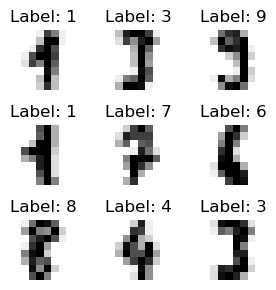

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(3, 3))
# Flatten the axes array for easy iterating
axes = axes.flatten()
for i in range(90, 99):  # Display images from 90 to 99
    image, label = data.images[i], y[i]
    axes[i-90].imshow(image, cmap='binary')  # Default grayscale color map
    axes[i-90].set_title(f'Label: {label}')
    axes[i-90].axis('off')  # Hide axes for a cleaner look

plt.tight_layout()  
plt.show()

In [56]:
n_samples = len(data.images)

In [57]:
X = data.images.reshape((n_samples, -1))

In [58]:
scaler = StandardScaler()

In [59]:
X = scaler.fit_transform(X)
# Convert labels to one-hot encoding
y = to_categorical(y)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True)

In [61]:
X_train.shape,X_test.shape 

((1078, 64), (719, 64))

In [62]:
model = tf.keras.Sequential([

#   layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
#   layers.MaxPool2D(pool_size=(2, 2)),
  
#   layers.Flatten(),

  layers.Dense(units=128, activation='relu'),
  layers.Dense(units=10, activation='softmax')  
])


In [63]:
# model = keras.Sequential([
    
#     layers.Dense(128,activation='relu'),
#     layers.Dense(10,activation='softmax')
    
# ])

In [64]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [65]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.2590 - loss: 2.1841     
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8648 - loss: 0.8793
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9349 - loss: 0.4447
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9602 - loss: 0.2827
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9727 - loss: 0.2099
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9768 - loss: 0.1694
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9802 - loss: 0.1465
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9908 - loss: 0.1164
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9932 - loss: 0.0816
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9938 - loss: 0.0768


In [66]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.9669 - loss: 0.1430


[0.1427888423204422, 0.9666203260421753]